## Task: Predicition of Mobile Prices 

Target: From the Given Dataset, price ranges of mobile devices and respresnt it visually

## Author : Mohamed Sherif El-Boraie

### Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.reset_orig()

In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Load and Explore the dataset 

In [4]:
train_data = "D:/Mohamed Sheriff/Projects/Model_Price_Prediction/Data/train.csv"
test_data = "D:/Mohamed Sheriff/Projects/Model_Price_Prediction/Data/test.csv"

data = pd.read_csv(train_data)
test = pd.read_csv(test_data)

In [5]:
#Show off all columns
pd.set_option('display.max_columns', None)

In [6]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [7]:
test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


It appears that the dataset contains only numerical features. If all the features in the dataset are numerical, there is no need for any type of encoding in Feature Engineering Section

Dataset Features >>> <br>
● Id : ID.<br>
● battery_power : Total energy a battery can store in one time measured in mAh.<br>
● blue : Has bluetooth or not.<br>
● clock_speed : speed at which microprocessor executes instructions.<br>
● dual_sim : Has dual sim support or not.<br>
● fc : Front Camera megapixels.<br>
● four_g : Has 4G or not.<br>
● int_memory : Internal Memory in Gigabytes.<br>
● m_dep : Mobile Depth in cm.<br>
● mobile_wt : Weight of mobile phone.<br>
● n_cores : Number of cores of processor.<br>
● pc : Primary Camera megapixels.<br>
● px_height : Pixel Resolution Height.<br>
● px_width : Pixel Resolution Width.<br>
● ram : Random Access Memory in Megabytes.<br>
● sc_h : Screen Height of mobile in cm.<br>
● sc_w : Screen Width of mobile in cm<br>
● talk_time : longest time that a single battery charge will last.<br>
● three_g : has 3g or not.<br>
● touch_screen : Has touch screen or not<br>
● wifi : has wifi or not.<br>
● price_range: This is the target variable with values of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No missing values was found

In [10]:
data.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Visualize Dataset

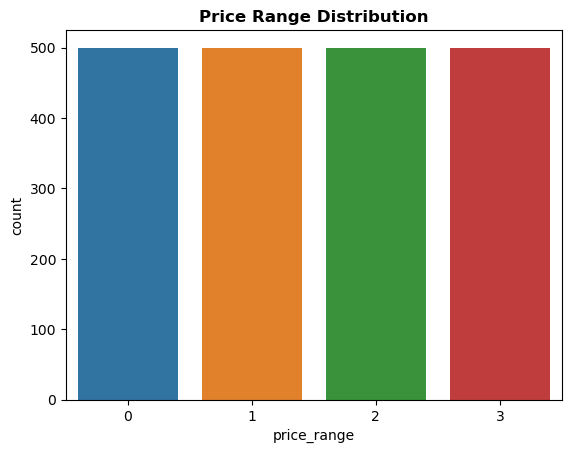

In [11]:
# Check the distribution of the target variable
sns.countplot(x='price_range', data=data)
plt.title("Price Range Distribution", fontweight='bold')
plt.show()

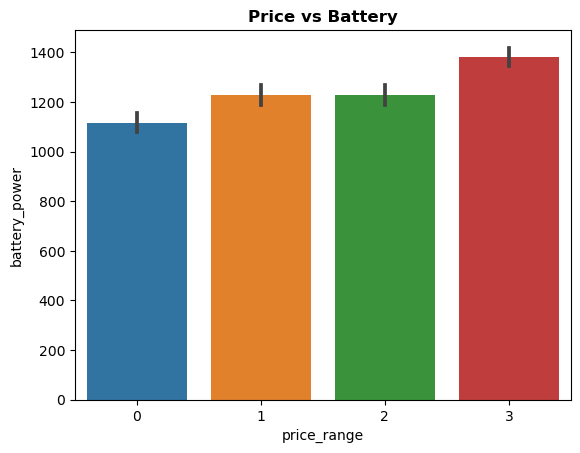

In [12]:
sns.barplot(x='price_range', y='battery_power',data=data)
plt.title("Price vs Battery", fontweight='bold')
plt.show()

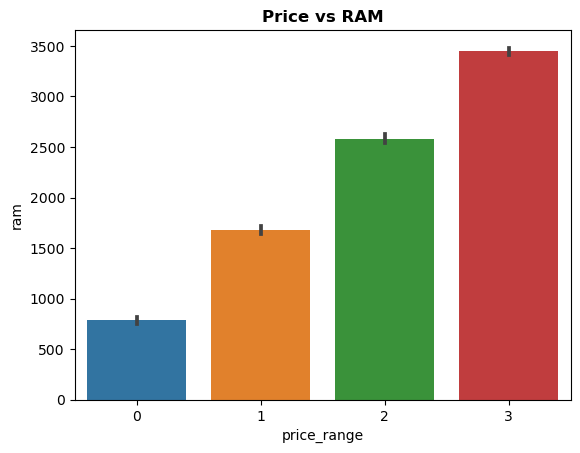

In [13]:
sns.barplot(x='price_range', y='ram',data=data)
plt.title("Price vs RAM", fontweight='bold')
plt.show()

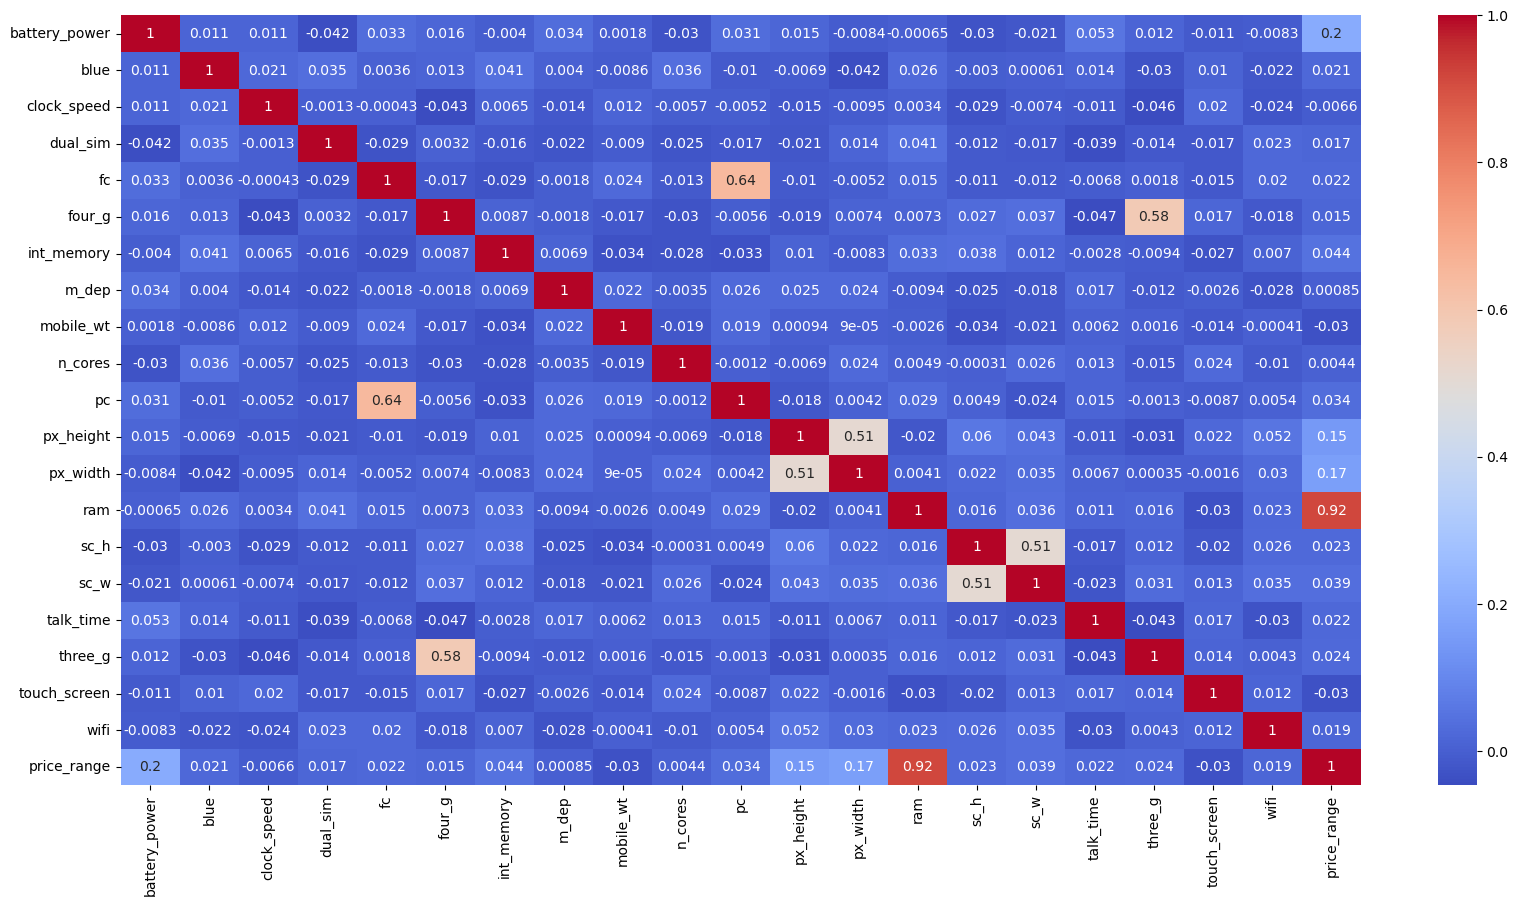

In [14]:
# Visualize the correlation between features
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

- Top Features Correlated with Price Range:<br>
'RAM' is high corr to the price range is the  with 0.92<br>
'battery power' is corr with price range with 0.2 <br>
'px_height' and 'px_width' are  corr with price range with 0.15,0.17 respectively <br>
'pc' and 'fc' corr with price range with 0.034 and 0.022 respectively

- Multicollinearity occurs between 'px_height' and 'px_width' & 'pc' and 'fc'<br>
A solution, If the correlation between two independent columns is high, one of them must be removed for modeling. Because the issue of multicollinearity arises.<br>
Another Solution for Multicollinearity, using dimensionality reduction techniques like (PCA) to create new uncorrelated features<br>
We can either combine features or remove the low corr to price range<br>
We are going to combine features and drop the 4 columns from the dataset

### Explainatory Data Analysis

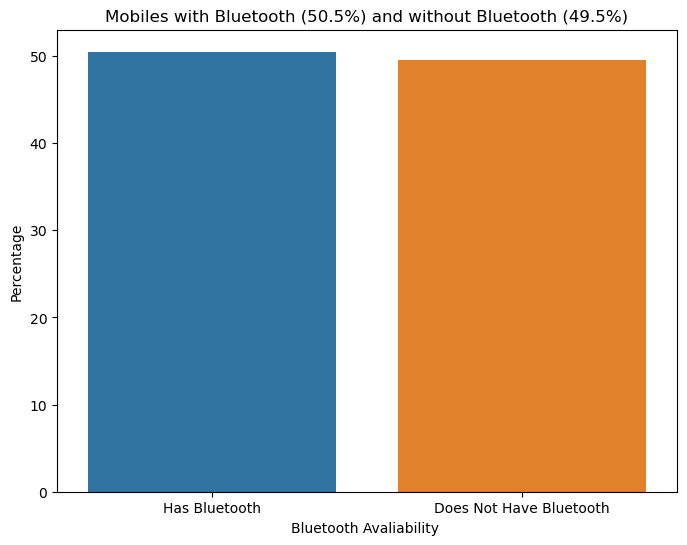

In [15]:
blue_counts = data['blue'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Has Bluetooth', 'Does Not Have Bluetooth'], y=blue_counts.values)

# Set the plot title and axis labels
plt.title('Mobiles with Bluetooth (50.5%) and without Bluetooth (49.5%)')
plt.xlabel('Bluetooth Avaliability ')
plt.ylabel('Percentage')

# Show the plot
plt.show()

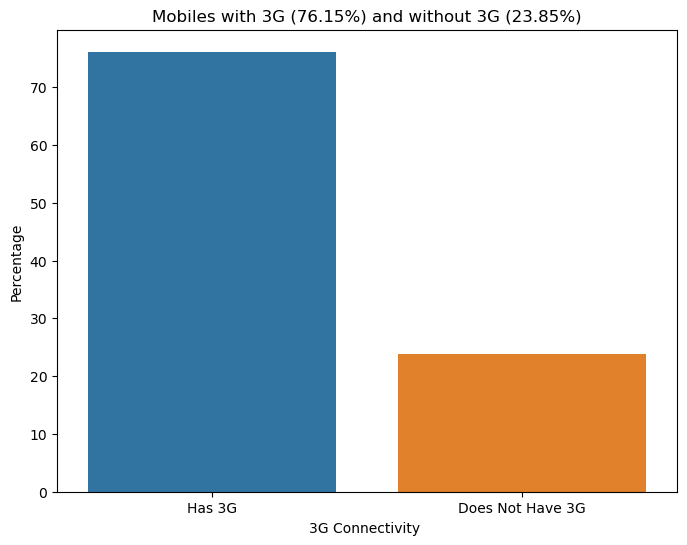

In [16]:
threeg_counts = data['three_g'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Has 3G', 'Does Not Have 3G'], y=threeg_counts.values)

# Set the plot title and axis labels
plt.title('Mobiles with 3G (76.15%) and without 3G (23.85%)')
plt.xlabel('3G Connectivity ')
plt.ylabel('Percentage')

# Show the plot
plt.show()

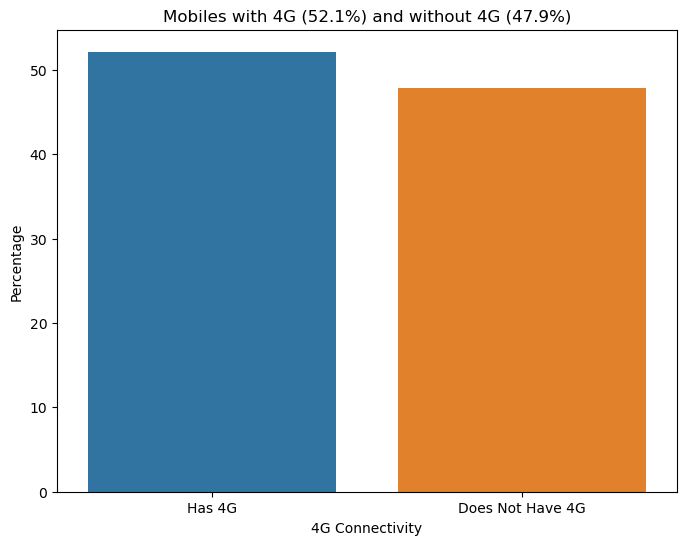

In [17]:
fourg_counts = data['four_g'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Has 4G', 'Does Not Have 4G'], y=fourg_counts.values)

# Set the plot title and axis labels
plt.title('Mobiles with 4G (52.1%) and without 4G (47.9%)')
plt.xlabel('4G Connectivity')
plt.ylabel('Percentage')

# Show the plot
plt.show()

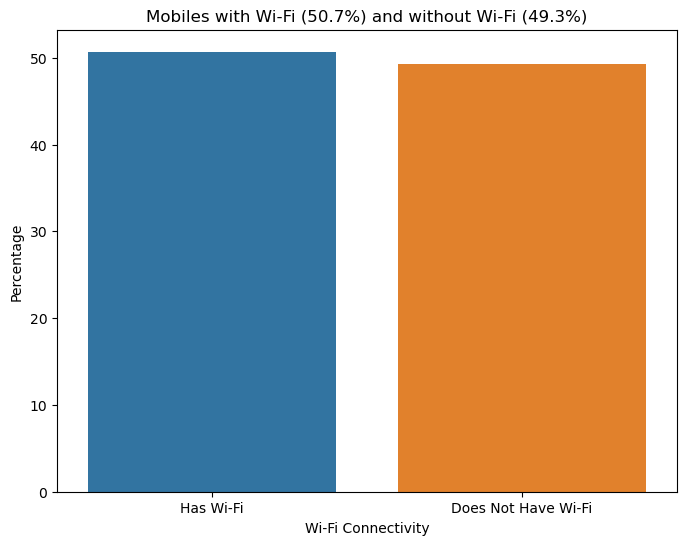

In [18]:
# Count the number of mobiles with and without 4G
wifi_counts = data['wifi'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Has Wi-Fi', 'Does Not Have Wi-Fi'], y=wifi_counts.values)

# Set the plot title and axis labels
plt.title('Mobiles with Wi-Fi (50.7%) and without Wi-Fi (49.3%)')
plt.xlabel('Wi-Fi Connectivity')
plt.ylabel('Percentage')

# Show the plot
plt.show()

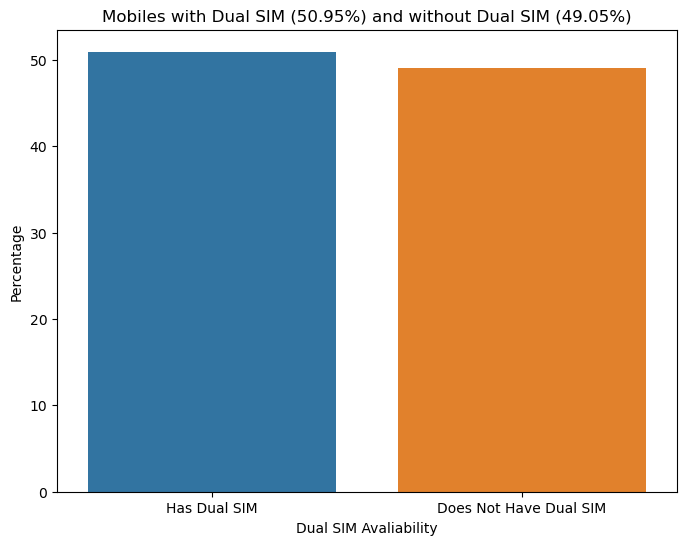

In [19]:
dualsim_counts = data['dual_sim'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Has Dual SIM', 'Does Not Have Dual SIM'], y=dualsim_counts.values)

# Set the plot title and axis labels
plt.title('Mobiles with Dual SIM (50.95%) and without Dual SIM (49.05%)')
plt.xlabel('Dual SIM Avaliability')
plt.ylabel('Percentage')

# Show the plot
plt.show()

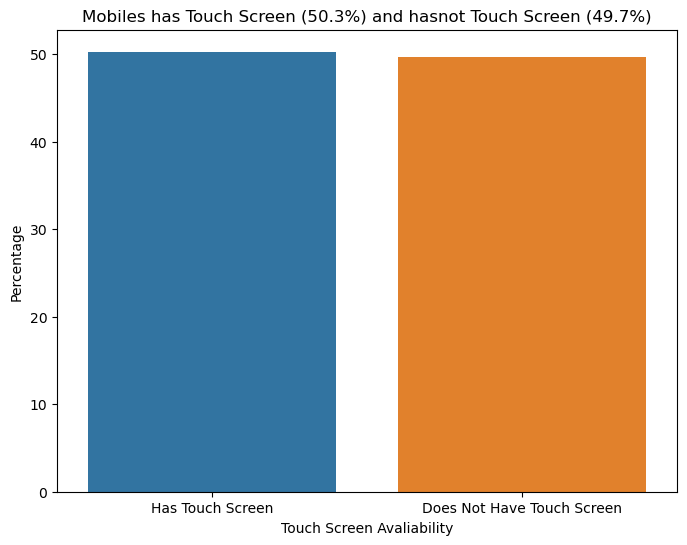

In [20]:
touchsc_counts = data['touch_screen'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['Has Touch Screen', 'Does Not Have Touch Screen'], y=touchsc_counts.values)

# Set the plot title and axis labels
plt.title('Mobiles has Touch Screen (50.3%) and hasnot Touch Screen (49.7%)')
plt.xlabel('Touch Screen Avaliability')
plt.ylabel('Percentage')

# Show the plot
plt.show()

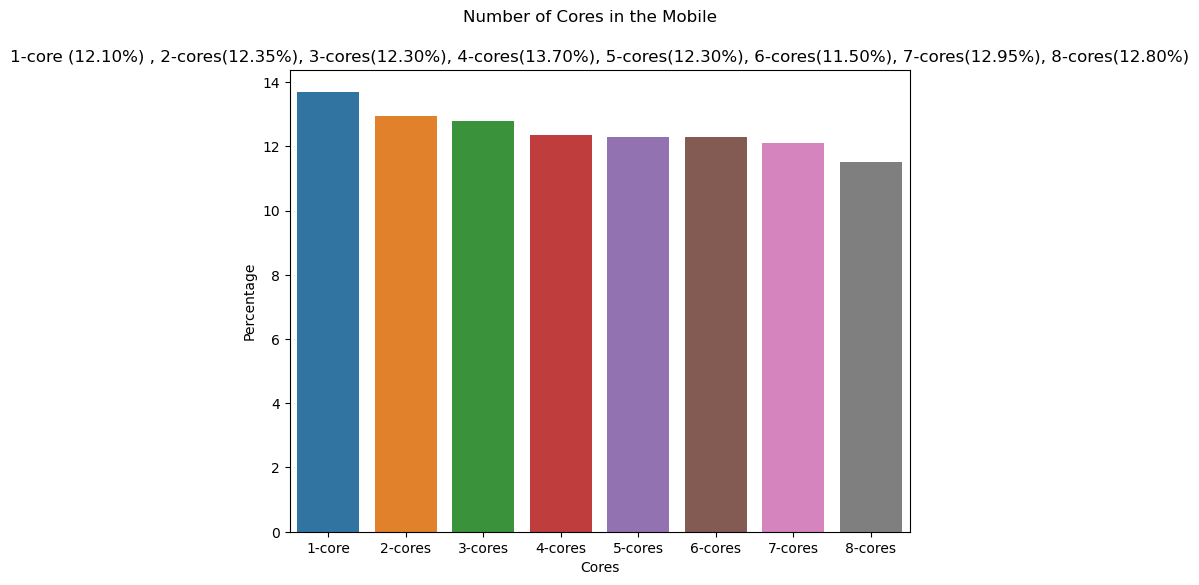

In [21]:
ncores_counts = data['n_cores'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=['1-core', '2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'], y=ncores_counts.values)

# Set the plot title and axis labels
plt.suptitle('Number of Cores in the Mobile')
plt.title('1-core (12.10%) , 2-cores(12.35%), 3-cores(12.30%), 4-cores(13.70%), 5-cores(12.30%), 6-cores(11.50%), 7-cores(12.95%), 8-cores(12.80%)')
plt.xlabel('Cores')
plt.ylabel('Percentage')

# Show the plot
plt.show()

> The Plots shows that Bluetooth, Dual SIM, 4G,and Number of Cores almost have equal distributions<br>
> Touch screen and Wi-Fi have the same distribution as above<br>
> Except for 3G Avaliability in the mobiles is much more than the number of phones that do not have it

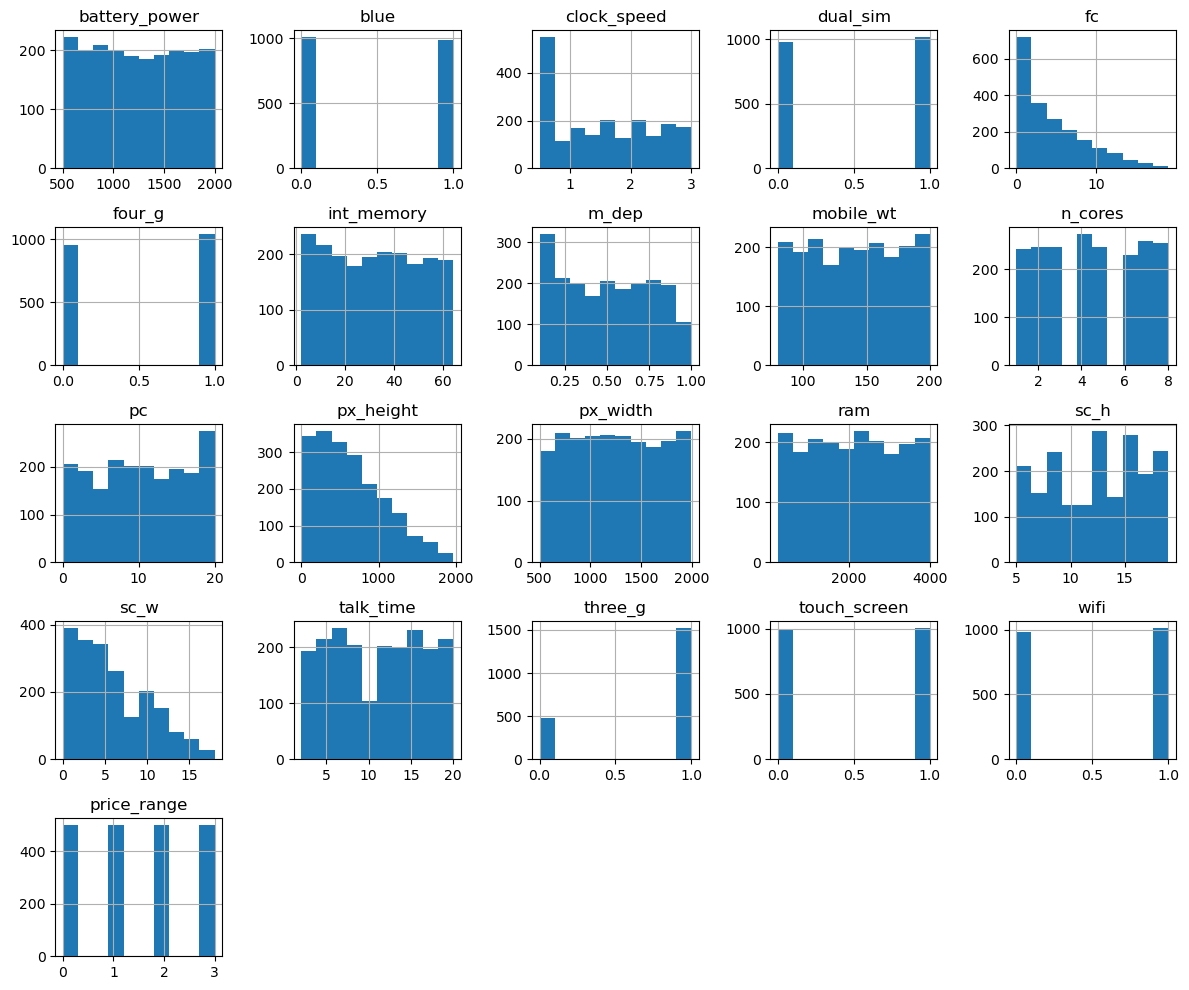

In [22]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

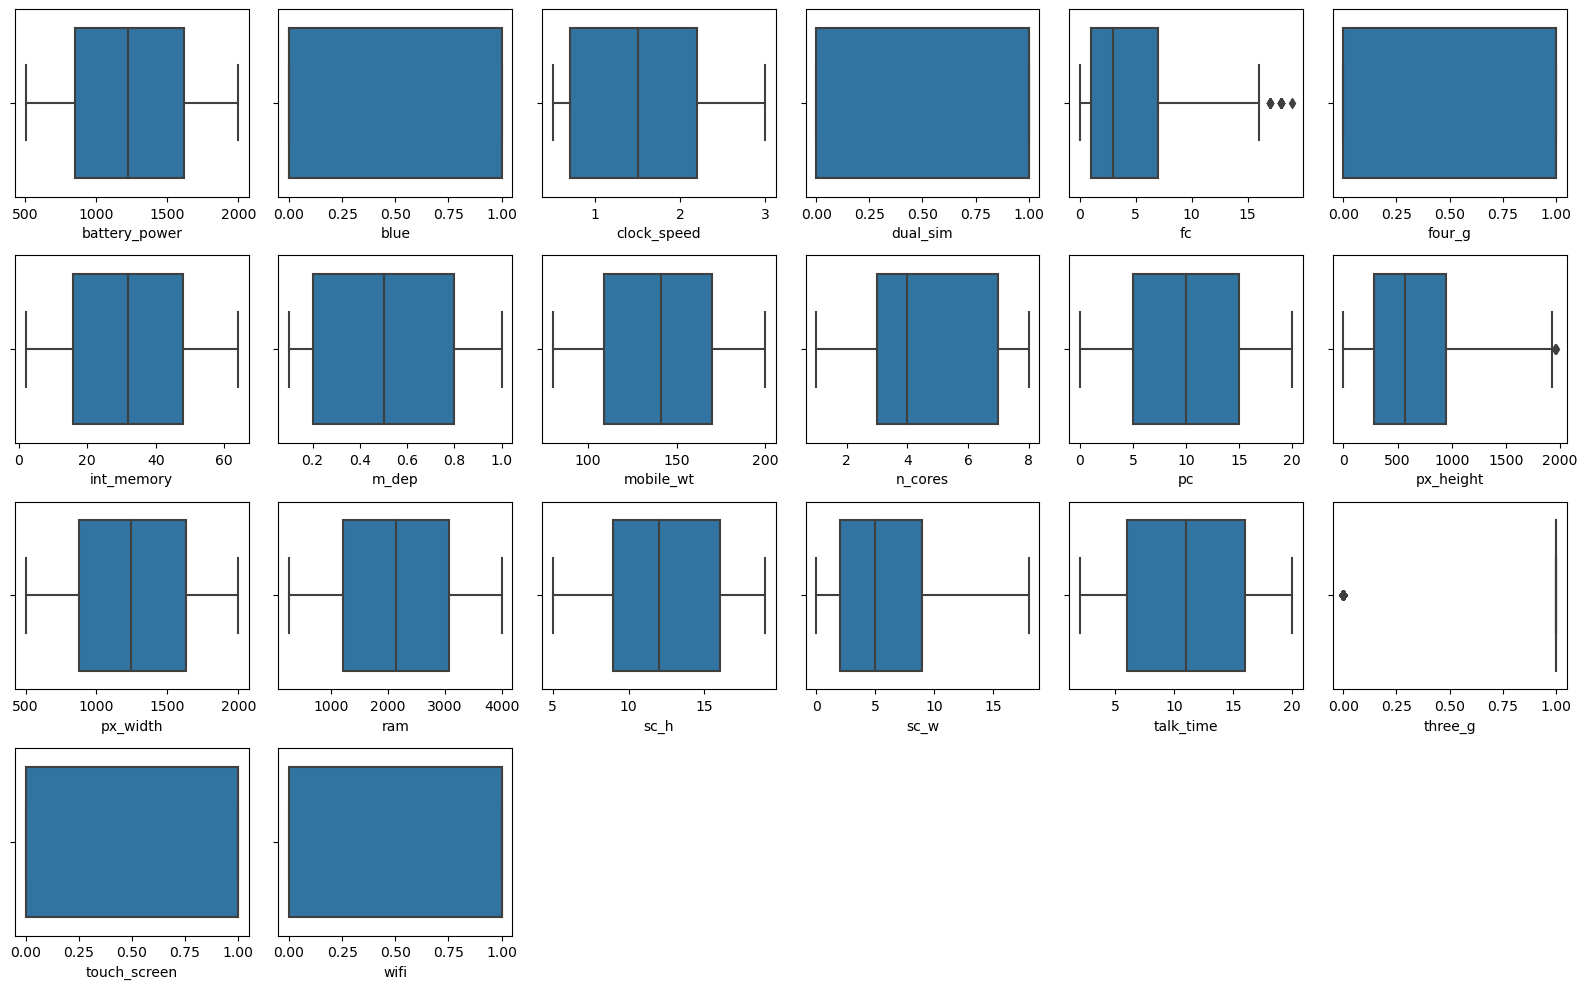

In [23]:
# Create box plots for each feature
plt.figure(figsize=(16, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(4, 6, i+1)
    sns.boxplot(x=data[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Outliers considered with 'fc','px_height','sc_w'

Text(0.5, 1.0, 'Front Camera megapixels Frequency')

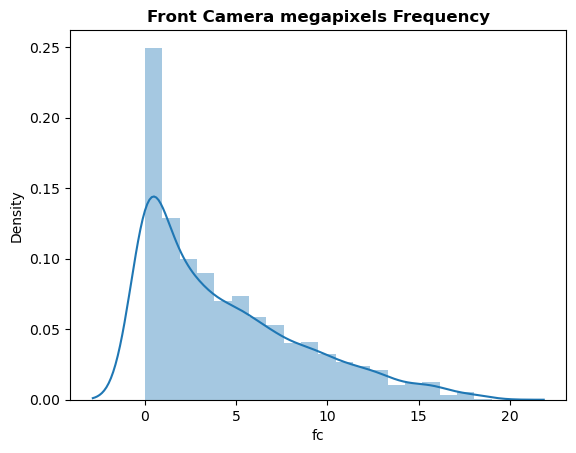

In [24]:
#data.fc.hist(bins = 20)

#distplot is a deprecated function and will be removed we can use instead histplot, but i used distplot as it better visualizer

sns.distplot(data['fc'],bins = 20)
plt.title('Front Camera megapixels Frequency', fontweight='bold')

<AxesSubplot: xlabel='fc', ylabel='Density'>

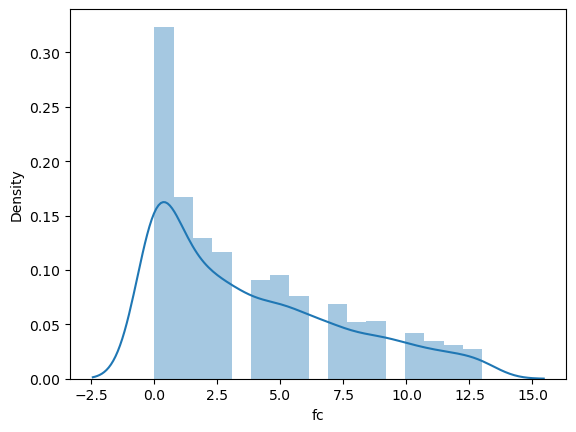

In [25]:
#Dealing with Outliers
q = data['fc'].quantile(0.96)
data_1 = data[data['fc']<q]
sns.distplot(data_1['fc'])

Text(0.5, 1.0, 'Pixel Resolution Height Frequency of mobile')

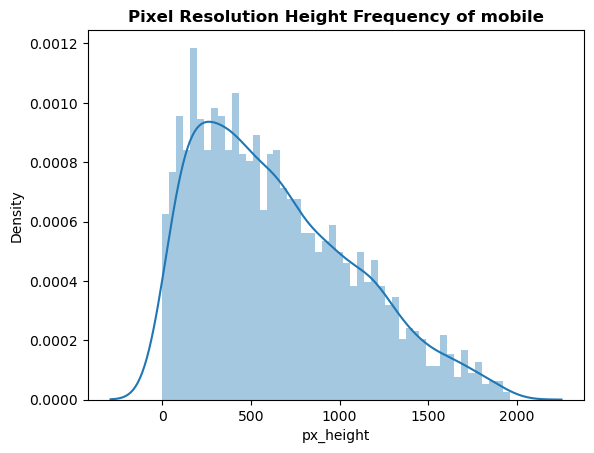

In [26]:
#data.px_height.hist(bins = 50)

#distplot is a deprecated function and will be removed we can use instead histplot, but i used distplot as it better visualizer
sns.distplot(data['px_height'],bins = 50)

plt.title('Pixel Resolution Height Frequency of mobile', fontweight='bold')

<AxesSubplot: xlabel='px_height', ylabel='Density'>

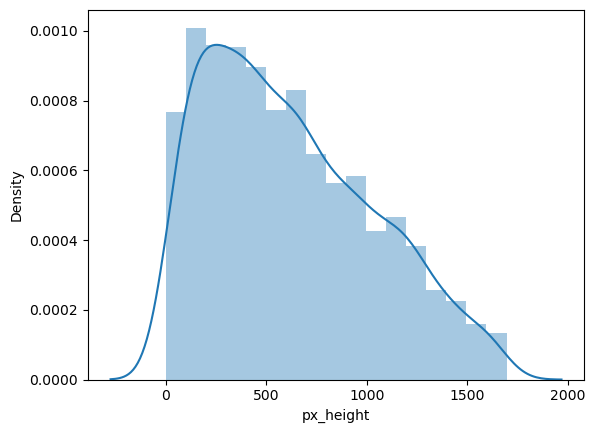

In [27]:
q = data['px_height'].quantile(0.98)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data[data['px_height']<q]
sns.distplot(data_1['px_height'])

Text(0.5, 1.0, 'Screen Width of mobile in cm Frequency')

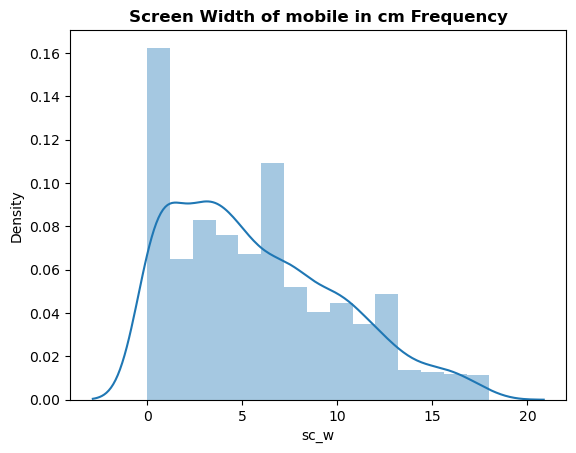

In [28]:
#data.sc_w.hist(bins = 15)

#distplot is a deprecated function and will be removed we can use instead histplot, but i used distplot as it better visualizer

sns.distplot(data['sc_w'],bins = 15)
plt.title('Screen Width of mobile in cm Frequency', fontweight='bold')

<AxesSubplot: xlabel='sc_w', ylabel='Density'>

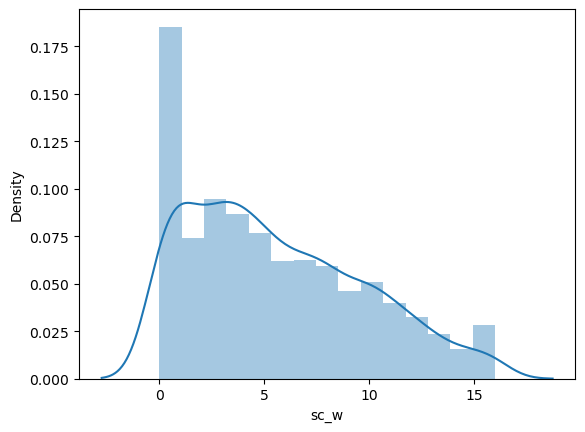

In [29]:
q = data['sc_w'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data[data['sc_w']<q]
sns.distplot(data_1['sc_w'])

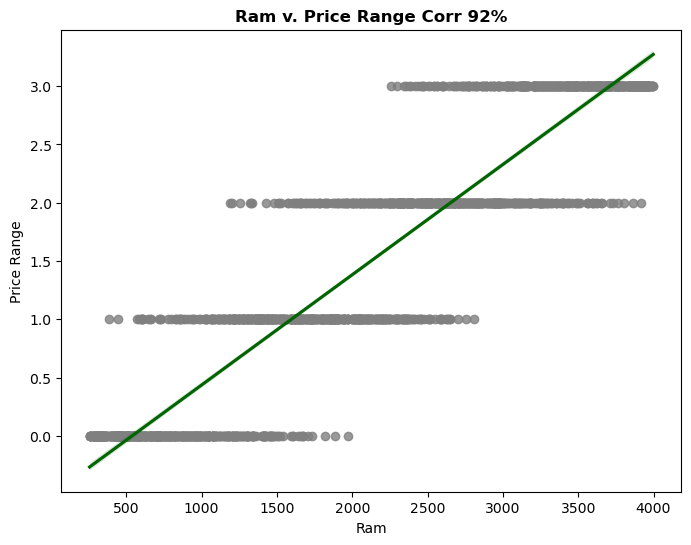

In [30]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='ram', y='price_range',color='grey', line_kws={"color": "darkgreen"})

# Set the plot title and axis labels
plt.title('Ram v. Price Range Corr 92%', fontweight='bold')
plt.xlabel('Ram')
plt.ylabel('Price Range')

# Show the plot
plt.show()

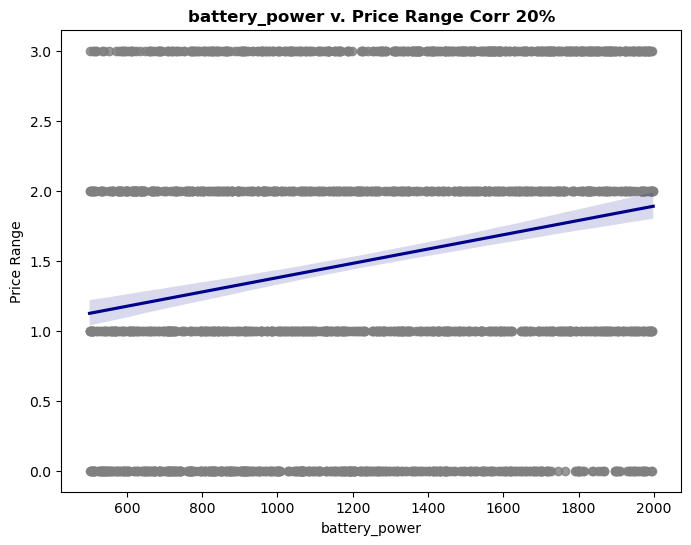

In [31]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='battery_power', y='price_range', color='grey', line_kws={"color": "darkblue"})

# Set the plot title and axis labels
plt.title('battery_power v. Price Range Corr 20%', fontweight='bold')
plt.xlabel('battery_power')
plt.ylabel('Price Range')

# Show the plot
plt.show()

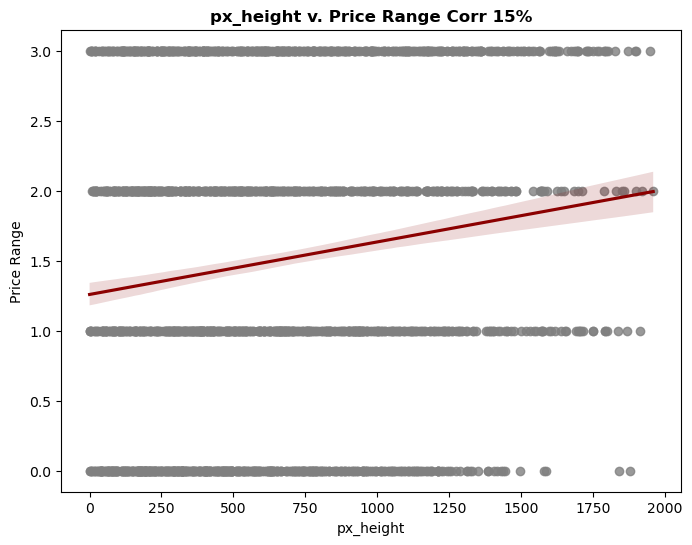

In [32]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='px_height', y='price_range', color='grey', line_kws={"color": "darkred"})

# Set the plot title and axis labels
plt.title('px_height v. Price Range Corr 15%', fontweight='bold')
plt.xlabel('px_height')
plt.ylabel('Price Range')

# Show the plot
plt.show()

### Train_Test_Spilt

Perform train-test split to create a separate validation set for evaluating your model's performance. 

In [33]:
inputs = data.drop(['price_range'], axis=1) 
target = data['price_range']

In [34]:
X_train, X_val, y_train, y_val = train_test_split(inputs, target, test_size=0.2, random_state=42)

### Feature Engineering

In [35]:
# SelectKBest with chi2
k = 10  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Get the selected feature names
feature_names = X_train.columns[selector.get_support(indices=True)].tolist()

In [36]:
feature_names

['battery_power',
 'fc',
 'int_memory',
 'mobile_wt',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

### Feature Scaling

In [38]:
# Define the selected features for feature scaling
selected_features = ['battery_power',
 'fc',
 'int_memory',
 'mobile_wt',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

# Create a new DataFrame with the selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Perform feature scaling on the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)

### Choose  Model with Performing HyperParameter Tuning

In [39]:
target_names = ['0', '1', '2', '3']

In [40]:
# Define the models and their respective parameter grids for hyperparameter tuning

models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10],'min_samples_leaf': [1,5,10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10 , 15]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights':['uniform','distance']}),
    'Naive Bayes': (GaussianNB(), {}),
    'XGBoost': (xgb.XGBClassifier(), {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}),
    'Neural Network': (MLPClassifier(), {'hidden_layer_sizes': [(100,),(50, 50), (20, 20, 20)], 'activation': ['relu', 'tanh'], 'solver': ['adam']}),
    'SVM': (SVC(), {'C': range(1, 151), 'kernel': ['poly'],'gamma': ['scale', 'auto']})

}

Training and evaluating Logistic Regression
--- Logistic Regression ---
Testing Data:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.51      0.51      0.51        91
           2       0.48      0.51      0.50        92
           3       0.69      0.71      0.70       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400

Confusion Matrix:


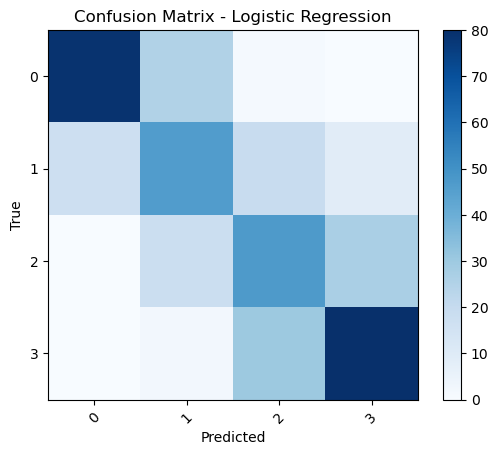

Best Model:LogisticRegression(C=10)
-------------------------------

Training and evaluating Random Forest
--- Random Forest ---
Testing Data:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.86      0.82      0.84        91
           2       0.78      0.85      0.81        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Confusion Matrix:


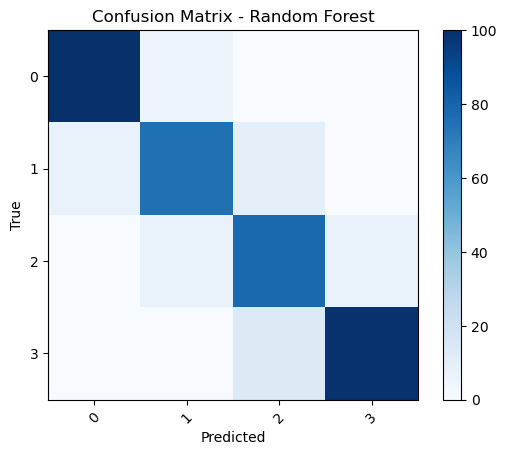

Best Model:RandomForestClassifier(n_estimators=300)
-------------------------------

Training and evaluating Decision Tree
--- Decision Tree ---
Testing Data:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       105
           1       0.75      0.87      0.80        91
           2       0.76      0.75      0.75        92
           3       0.90      0.87      0.88       112

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.84      0.84       400

Confusion Matrix:


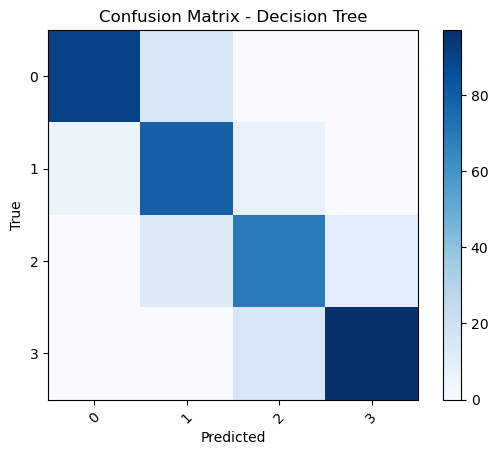

Best Model:DecisionTreeClassifier(criterion='entropy', max_depth=15)
-------------------------------

Training and evaluating KNN
--- KNN ---
Testing Data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       105
           1       0.93      0.96      0.94        91
           2       0.93      0.95      0.94        92
           3       0.99      0.95      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400

Confusion Matrix:


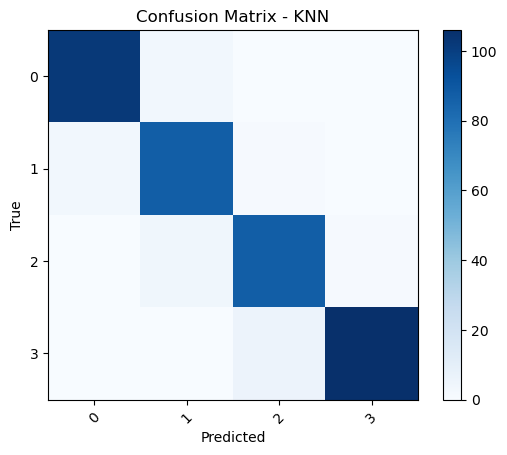

Best Model:KNeighborsClassifier(n_neighbors=7)
-------------------------------

Training and evaluating Naive Bayes
--- Naive Bayes ---
Testing Data:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.77      0.68      0.72        91
           2       0.64      0.77      0.70        92
           3       0.88      0.81      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.81      0.80      0.80       400

Confusion Matrix:


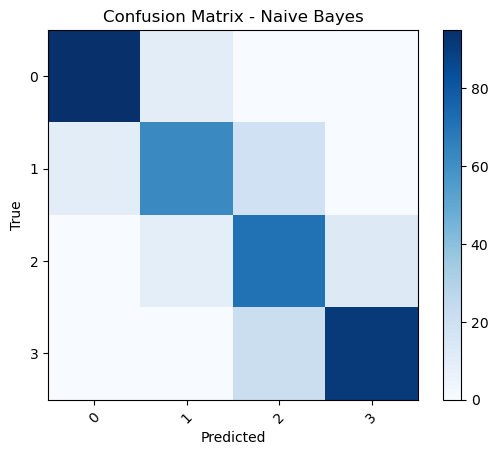

Best Model:GaussianNB()
-------------------------------

Training and evaluating XGBoost
--- XGBoost ---
Testing Data:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.84      0.92      0.88        91
           2       0.85      0.82      0.83        92
           3       0.94      0.90      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400

Confusion Matrix:


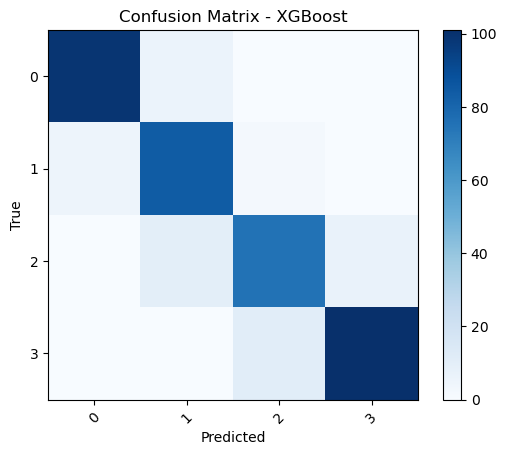

Best Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
-------------------------------

Training and evaluating Neural Network
--- Neural Network ---
Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       105
           1  

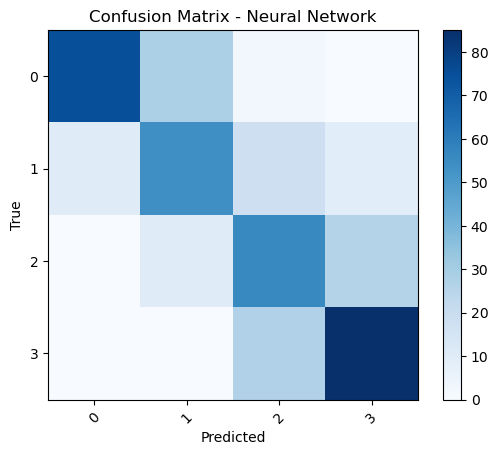

Best Model:MLPClassifier(activation='tanh')
-------------------------------

Training and evaluating SVM
--- SVM ---
Testing Data:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.96      1.00      0.98        91
           2       0.97      0.98      0.97        92
           3       1.00      0.97      0.99       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Confusion Matrix:


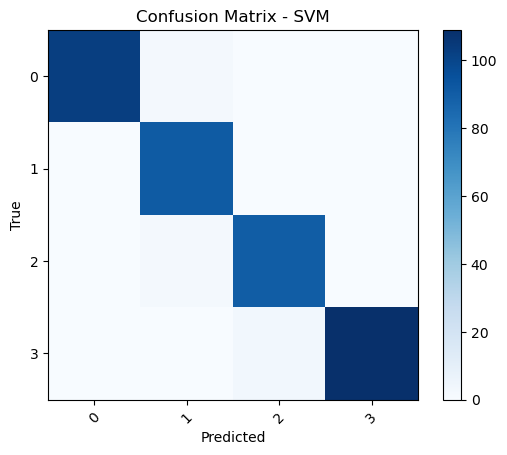

Best Model:SVC(C=31, kernel='poly')
-------------------------------



In [41]:
for model_name, (model, param_grid) in models.items():
    print(f"Training and evaluating {model_name}")
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Evaluation on testing data
    y_val_pred = best_model.predict(X_val)
    test_classification_report = classification_report(y_val, y_val_pred,  target_names= target_names )
    test_confusion_mat = confusion_matrix(y_val, y_val_pred)
    
    print(f"--- {model_name} ---")
    print("Testing Data:")
    print(test_classification_report)
    print("Confusion Matrix:")
    # Plot Confusion Matrix
    plt.figure()
    plt.imshow(test_confusion_mat, cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.colorbar()
    plt.xticks(np.arange(len(target_names)), target_names, rotation=45)
    plt.yticks(np.arange(len(target_names)), target_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    print(f"Best Model:{best_model}")
    
    print("-------------------------------\n")

In [42]:
#Accuracy: The SVM model achieved an accuracy of 98% on the testing data.
#  This means that 98% of the samples in the testing set were correctly classified by the model.

#Precision: The precision score measures the proportion of correctly predicted samples for each class.
#  The precision for class 0 is 1.00, class 1 is 0.96, class 2 is 0.97, and class 3 is 1.00. 
#  These scores indicate that the SVM model has a high ability to correctly identify samples for each class.

#Recall: The recall score measures the proportion of correctly predicted samples out of the total samples of each class. 
#  The recall for class 0 is 0.98, class 1 is 1.00, class 2 is 0.98, and class 3 is 0.97. 
#  These scores indicate that the SVM model has a high ability to capture the true positive samples for each class.

#F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance.
#  The F1-score for class 0 is 0.99, class 1 is 0.98, class 2 is 0.97, and class 3 is 0.99. 
#  These scores indicate a strong balance between precision and recall for each class.

#Overall, the SVM model shows excellent performance on the testing data, with high accuracy and well-balanced precision,
#  recall, and F1-scores across the different classes. 
#  The best SVM model found during hyperparameter tuning has a parameter configuration of C=31 and a kernel of 'poly'.

- I have implmeneted 2 phases before but led to the model failure to train<br>

- Applying PCA for 'px_height' with 'px_width' to have 1 feature and 'pc' with 'fc'
- Applied Combination for each 2 columns -><br>
    ['pixel_resolution'] = ['px_height'] * ['px_width']<br>
    ['total_camera'] = ['pc'] + ['fc']<br>
    and Dropping the 4 columns replacing them with those 2 Columns<br>
- So I had to stick to having top 10 features from the model and apply hypertuning on the algorthims.

### Test on Test.csv

In [47]:
data_test = test.drop('id', axis=1)

In [48]:
svm_clf = SVC(C=31, kernel='poly')

In [49]:
svm_clf.fit(X_train, y_train)

SVC(C=31, kernel='poly')

In [50]:
test_predictions = svm_clf.predict(data_test)

In [52]:
data_test['Predicted_Price_Range'] = test_predictions

In [53]:
data_test.to_csv('test_with_predictions.csv', index=False)

In [54]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Predicted_Price_Range
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


### Save Best Model in .pkl Format

In [55]:
import pickle

In [59]:
best_model_name = "best_model_SVM.pkl"
with open(best_model_name, 'wb') as file:
    pickle.dump(svm_clf, file)
    
print(f"Best model saved as {best_model_name}")

Best model saved as best_model_SVM.pkl
